# NLP - Analysis of IMDB subword of size 8

In [3]:
import json
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
imdb, info = tfds.load("imdb_reviews/subwords8k",with_info=True,as_supervised=True)

Shuffling and writing examples to /home/prabhu/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete0W0EUZ/imdb_reviews-train.tfrecord


Shuffling and writing examples to /home/prabhu/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete0W0EUZ/imdb_reviews-test.tfrecord


Shuffling and writing examples to /home/prabhu/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete0W0EUZ/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /home/prabhu/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [6]:
train_data, test_data = imdb['train'], imdb['test']

In [8]:
tokenizer = info.features['text'].encoder

In [11]:
print(tokenizer.subwords[:30])

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_']


In [18]:
sample_string = 'Joker was a beautiful movie'

tokenized_string = tokenizer.encode(sample_string)
print("Tokenized string is : {}".format(tokenized_string))
print("Original string is : {}".format(tokenizer.decode(tokenized_string)))
for ts in tokenized_string:
    print('{}---------{}'.format(ts, tokenizer.decode([ts])))


Tokenized string is : [1001, 4856, 18, 4, 486, 65]
Original string is : Joker was a beautiful movie
1001---------Jo
4856---------ker 
18---------was 
4---------a 
486---------beautiful 
65---------movie


In [21]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [19]:
embedding_dim = 64
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(6, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [23]:
def plot_model(history,num_epochs):
    training_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    training_loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = np.arange(0,num_epochs)

    # Two plots
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))

    # Plot accuracy
    ax[0].plot(epochs,training_acc,label='training',color='r')
    ax[0].plot(epochs,val_acc,label='validation',color='dodgerblue')
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()

    # Plot loss
    ax[1].plot(epochs,training_loss,label='training',color='r')
    ax[1].plot(epochs,val_loss,label='validation',color='dodgerblue')
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()

    plt.show()

In [22]:
num_epochs = 10
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(train_dataset, 
                    epochs=num_epochs,
                   validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 14s 35ms/step - loss: 0.6735 - accuracy: 0.6109 - val_loss: 0.6228 - val_accuracy: 0.6985
Epoch 2/10
391/391 [==============================] - 14s 37ms/step - loss: 0.5111 - accuracy: 0.8046 - val_loss: 0.4358 - val_accuracy: 0.8426
Epoch 3/10
391/391 [==============================] - 15s 38ms/step - loss: 0.3605 - accuracy: 0.8733 - val_loss: 0.3574 - val_accuracy: 0.8637
Epoch 4/10
391/391 [==============================] - 15s 39ms/step - loss: 0.2933 - accuracy: 0.8944 - val_loss: 0.3285 - val_accuracy: 0.8707
Epoch 5/10
391/391 [==============================] - 16s 41ms/step - loss: 0.2557 - accuracy: 0.9100 - val_loss: 0.3178 - val_accuracy: 0.8727
Epoch 6/10
391/391 [==============================] - 17s 44ms/step - loss: 0.2309 - accuracy: 0.9174 - val_loss: 0.3248 - val_accuracy: 0.8717
Epoch 7/10
391/391 [==============================] - 17s 42ms/step - loss: 0.2099 - accuracy: 0.9250 - val_loss: 0.3079 - val_accuracy:

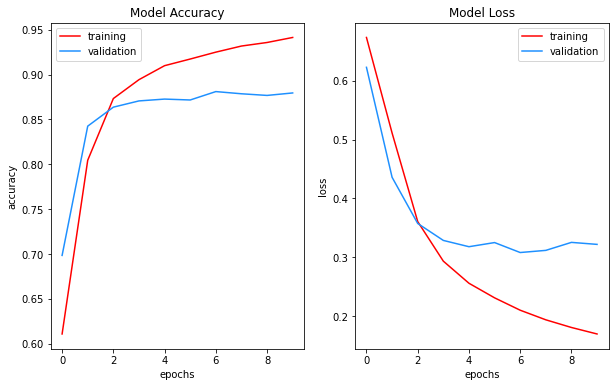

In [24]:
plot_model(history,num_epochs=10)